In [86]:
#Importing req libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

#Importing keras libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam,SGD

In [87]:
# Set default fig size
plt.rcParams['figure.figsize'] = (20, 12)

Here we have imported the necessary libraries for building a `Simple Neural Network` . We have used the `Keras` library for building the neural network. We have used the `Sequential` model from Keras. The Sequential model is a linear stack of layers. We will be using the `Dense layer` which is a fully connected layer,`Adam optimizer` for optimization. We will use the `mean squared error` as the loss function, `ReLU` activation function for the hidden layers and the `sigmoid` activation function for the output layer. We will be using the `train_test_split` function from the sklearn library to split the dataset into training and testing sets, `matplotlib` library for plotting the graphs.

In [88]:
np.random.seed(0)

#loading dataset 
iris = load_iris()
breast_cancer = load_breast_cancer()

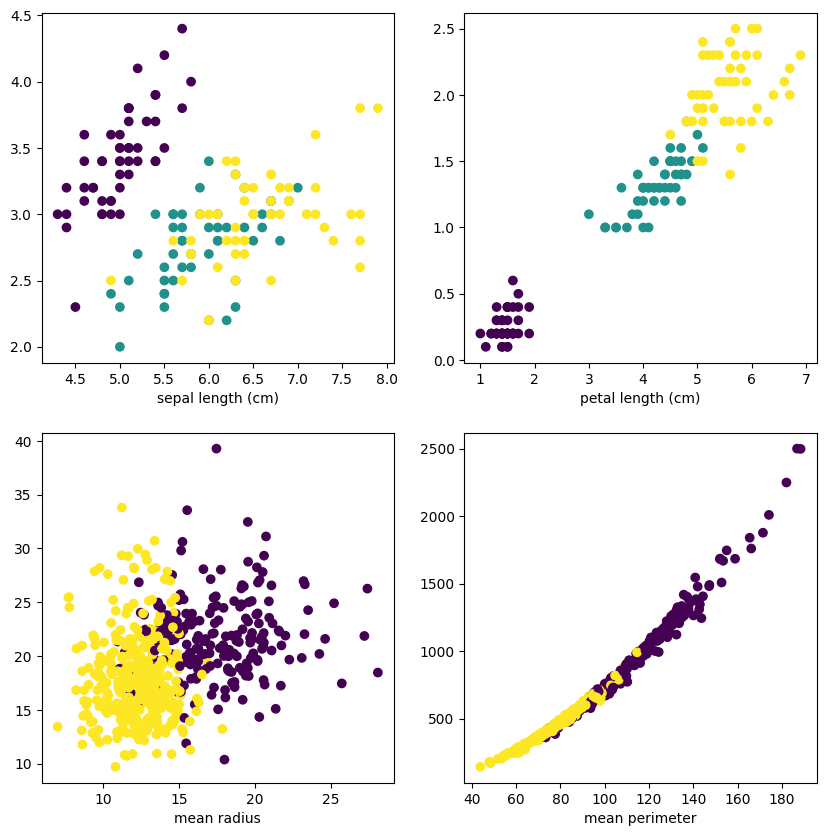

In [104]:
# Importing the required libraries
import matplotlib.pyplot as plt

# Setting the figure size for the overall plot
plt.figure(figsize=(10, 10))

# Creating the first subplot in a 2x2 grid
plt.subplot(2, 2, 1)
# Creating a scatter plot using the first and second features of the iris dataset
# iris.data[:, 0] selects all rows of the first feature
# iris.data[:, 1] selects all rows of the second feature
# c=iris.target assigns different colors to the points based on their target values
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
# Labeling the x-axis with the name of the first feature
plt.xlabel(iris.feature_names[0])

# Creating the second subplot in a 2x2 grid
plt.subplot(2, 2, 2)
# Creating a scatter plot using the third and fourth features of the iris dataset
# iris.data[:, 2] selects all rows of the third feature
# iris.data[:, 3] selects all rows of the fourth feature
# c=iris.target assigns different colors to the points based on their target values
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
# Labeling the x-axis with the name of the third feature
plt.xlabel(iris.feature_names[2])

# Creating the third subplot in a 2x2 grid
plt.subplot(2, 2, 3)
# Creating a scatter plot using the first and second features of the breast_cancer dataset
# breast_cancer.data[:, 0] selects all rows of the first feature
# breast_cancer.data[:, 1] selects all rows of the second feature
# c=breast_cancer.target assigns different colors to the points based on their target values
plt.scatter(breast_cancer.data[:, 0], breast_cancer.data[:, 1], c=breast_cancer.target)
# Labeling the x-axis with the name of the first feature
plt.xlabel(breast_cancer.feature_names[0])

# Creating the fourth subplot in a 2x2 grid
plt.subplot(2, 2, 4)
# Creating a scatter plot using the third and fourth features of the breast_cancer dataset
# breast_cancer.data[:, 2] selects all rows of the third feature
# breast_cancer.data[:, 3] selects all rows of the fourth feature
# c=breast_cancer.target assigns different colors to the points based on their target values
plt.scatter(breast_cancer.data[:, 2], breast_cancer.data[:, 3], c=breast_cancer.target)
# Labeling the x-axis with the name of the third feature
plt.xlabel(breast_cancer.feature_names[2])

# Displaying the plot
plt.show()


In [90]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2) #test_size=0.2 means 20% of data is used for testing and 80% for training 

Next up we will be defining the model , which is Sequential in this case and adding the layers to the model. We will be adding 3 layers to the model. The first layer will have 8 neurons and the input shape will be 4(As there are 4 features(values) in a single X_train array . The second layer will have 8 neurons and the third layer will have 3 (as there are 3 classes) neuron. We will be using the `ReLU` activation function for the hidden layers and the `softmax` activation function for the output layer. We will be using the `Adam` optimizer for optimization and the `mean squared error` as the loss function.

In [105]:

# Building the model
model = Sequential(
    [Dense(8, input_shape=(4,), activation='relu'),  # First hidden layer with 8 neurons and ReLU activation
    Dense(4, input_shape=(4,), activation='relu'),   # Second hidden layer with 4 neurons and ReLU activation
    Dense(3, activation='softmax')                   # Output layer with 3 neurons and softmax activation
    ]
)

# Compiling the model
model.compile(optimizer=Adam(lr=0.04), loss='mean_squared_error', metrics=['accuracy'])
# Adam optimizer with a learning rate of 0.04
# Using mean squared error as the loss function
# Evaluating model performance with accuracy metric

/home/kalyan/.local/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [92]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 8)                 40        
                                                                 
 dense_70 (Dense)            (None, 4)                 36        
                                                                 
 dense_71 (Dense)            (None, 3)                 15        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


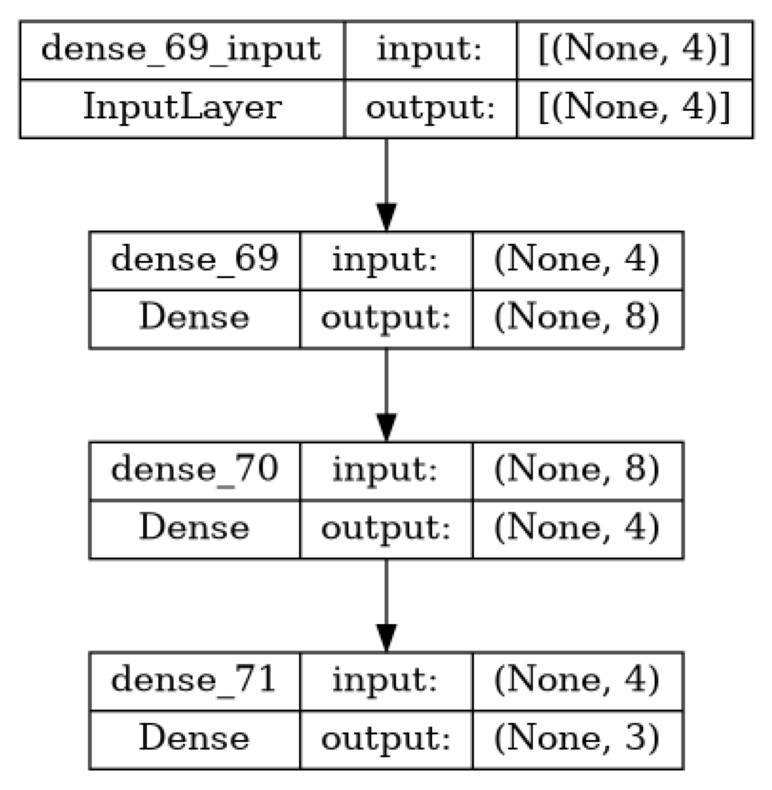

In [93]:
#plotting the model 
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
plt.figure(figsize=(10, 10))
plt.imshow(plt.imread('model.png'))
plt.axis('off')
plt.show()

epochs=100 means 100 iterations, to_categorical() converts the target into one hot encoding as we have 3 classes we need numerical values for each class
We are also using Tensorboard to visualize the training process.

In [94]:
#training the model
from tensorflow.keras.callbacks import TensorBoard
model.fit(X_train, to_categorical(y_train), epochs=20, callbacks=[TensorBoard('Iris_logs')]) 

#Start a Tensorboard session by pasting this in the terminal: tensorboard --logdir logs/ 

Epoch 1/20
4/4 [==============================] - 0s 3ms/step - loss: 0.2710 - accuracy: 0.3833
Epoch 2/20
4/4 [==============================] - 0s 3ms/step - loss: 0.1890 - accuracy: 0.5333
Epoch 3/20
4/4 [==============================] - 0s 3ms/step - loss: 0.1709 - accuracy: 0.6417
Epoch 4/20
4/4 [==============================] - 0s 3ms/step - loss: 0.1477 - accuracy: 0.6917
Epoch 5/20
4/4 [==============================] - 0s 2ms/step - loss: 0.1283 - accuracy: 0.6917
Epoch 6/20
4/4 [==============================] - 0s 3ms/step - loss: 0.1044 - accuracy: 0.7667
Epoch 7/20
4/4 [==============================] - 0s 3ms/step - loss: 0.0810 - accuracy: 0.8667
Epoch 8/20
4/4 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9750
Epoch 9/20
4/4 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9333
Epoch 10/20
4/4 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9417
Epoch 11/20
4/4 [======================

Text(0.5, 0, 'Epochs')

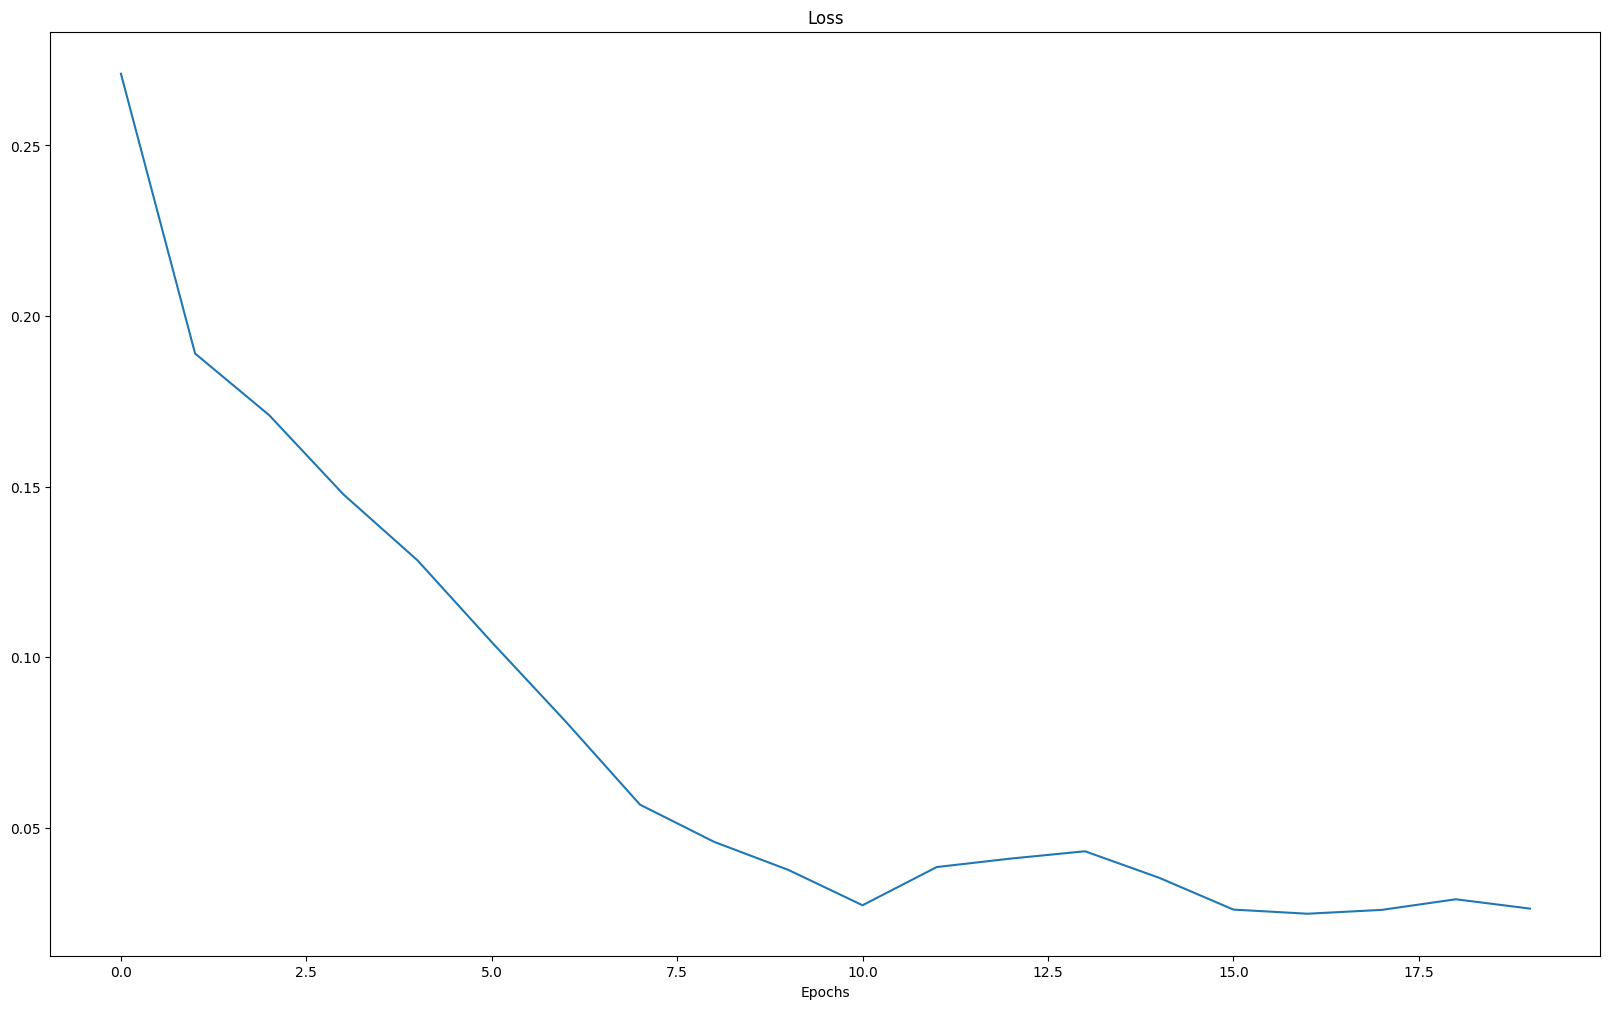

In [95]:
#plotting the loss and accuracy
plt.plot(model.history.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

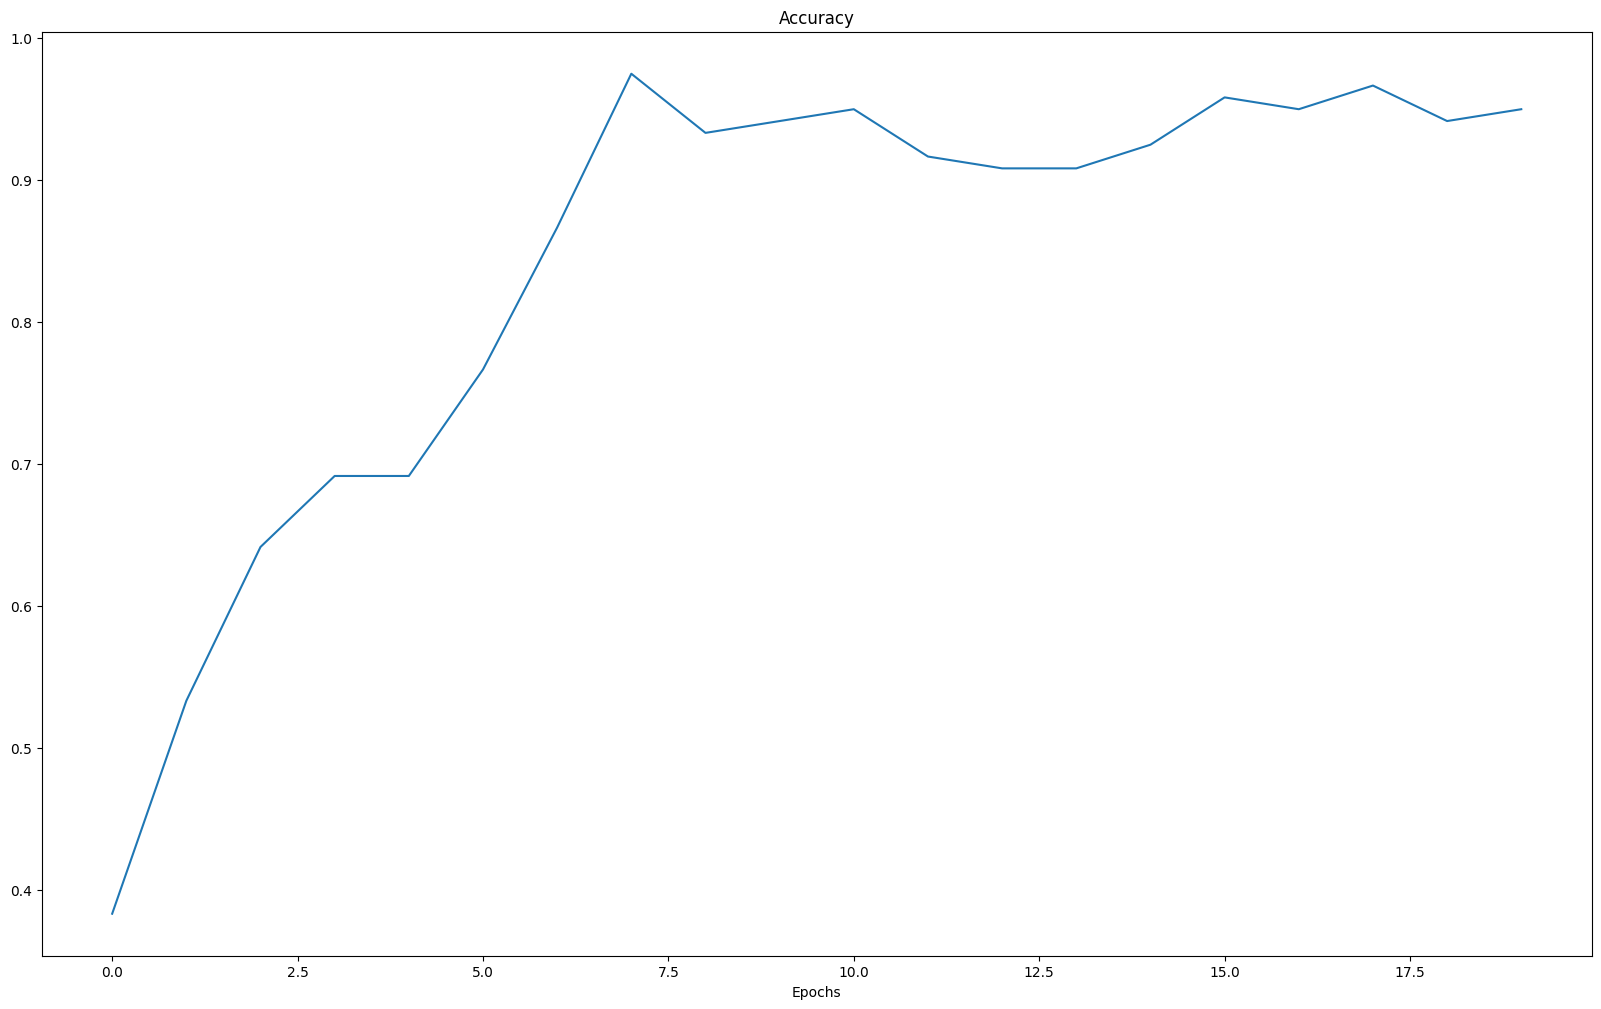

In [96]:
#plotting the accuracy
plt.plot(model.history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [97]:
#printing confusion matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred.argmax(axis=1)))

1/1 [==============================] - 0s 44ms/step
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [98]:
#evaluating the model
model.evaluate(X_test, to_categorical(y_test))

1/1 [==============================] - 0s 89ms/step - loss: 0.0276 - accuracy: 0.9667


[0.027550144121050835, 0.9666666388511658]

In [106]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2)

# Standardize the feature data by scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the sequential model
model1 = Sequential([
    # Add the first hidden layer with 8 neurons and ReLU activation
    Dense(8, input_shape=(30,), activation='relu'),
    
    # Add the second hidden layer with 4 neurons and ReLU activation
    Dense(4, input_shape=(30,), activation='relu'),
    
    # Add the output layer with 2 neurons (binary classification) and softmax activation
    Dense(2, activation='softmax')
])

# Compile the model with specified optimizer, loss function, and metrics
model1.compile(optimizer=SGD(lr=0.04), loss='mean_squared_error', metrics=['accuracy'])

# Print a summary of the model architecture
model1.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 8)                 248       
                                                                 
 dense_79 (Dense)            (None, 4)                 36        
                                                                 
 dense_80 (Dense)            (None, 2)                 10        
                                                                 
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


/home/kalyan/.local/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [107]:
#training the model
from tensorflow.keras.callbacks import TensorBoard
model1.fit(X_train, y_train, epochs=20, callbacks=[TensorBoard('Cancer_logs')])

Epoch 1/20
15/15 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.4022
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.6088
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 0.1939 - accuracy: 0.7341
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.1673 - accuracy: 0.7868
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 0.1448 - accuracy: 0.8374
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 0.1266 - accuracy: 0.8440
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 0.1128 - accuracy: 0.8527
Epoch 8/20
15/15 [==============================] - 0s 3ms/step - loss: 0.1023 - accuracy: 0.8615
Epoch 9/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.8703
Epoch 10/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.8747
Epoch 11/20
15/15 [

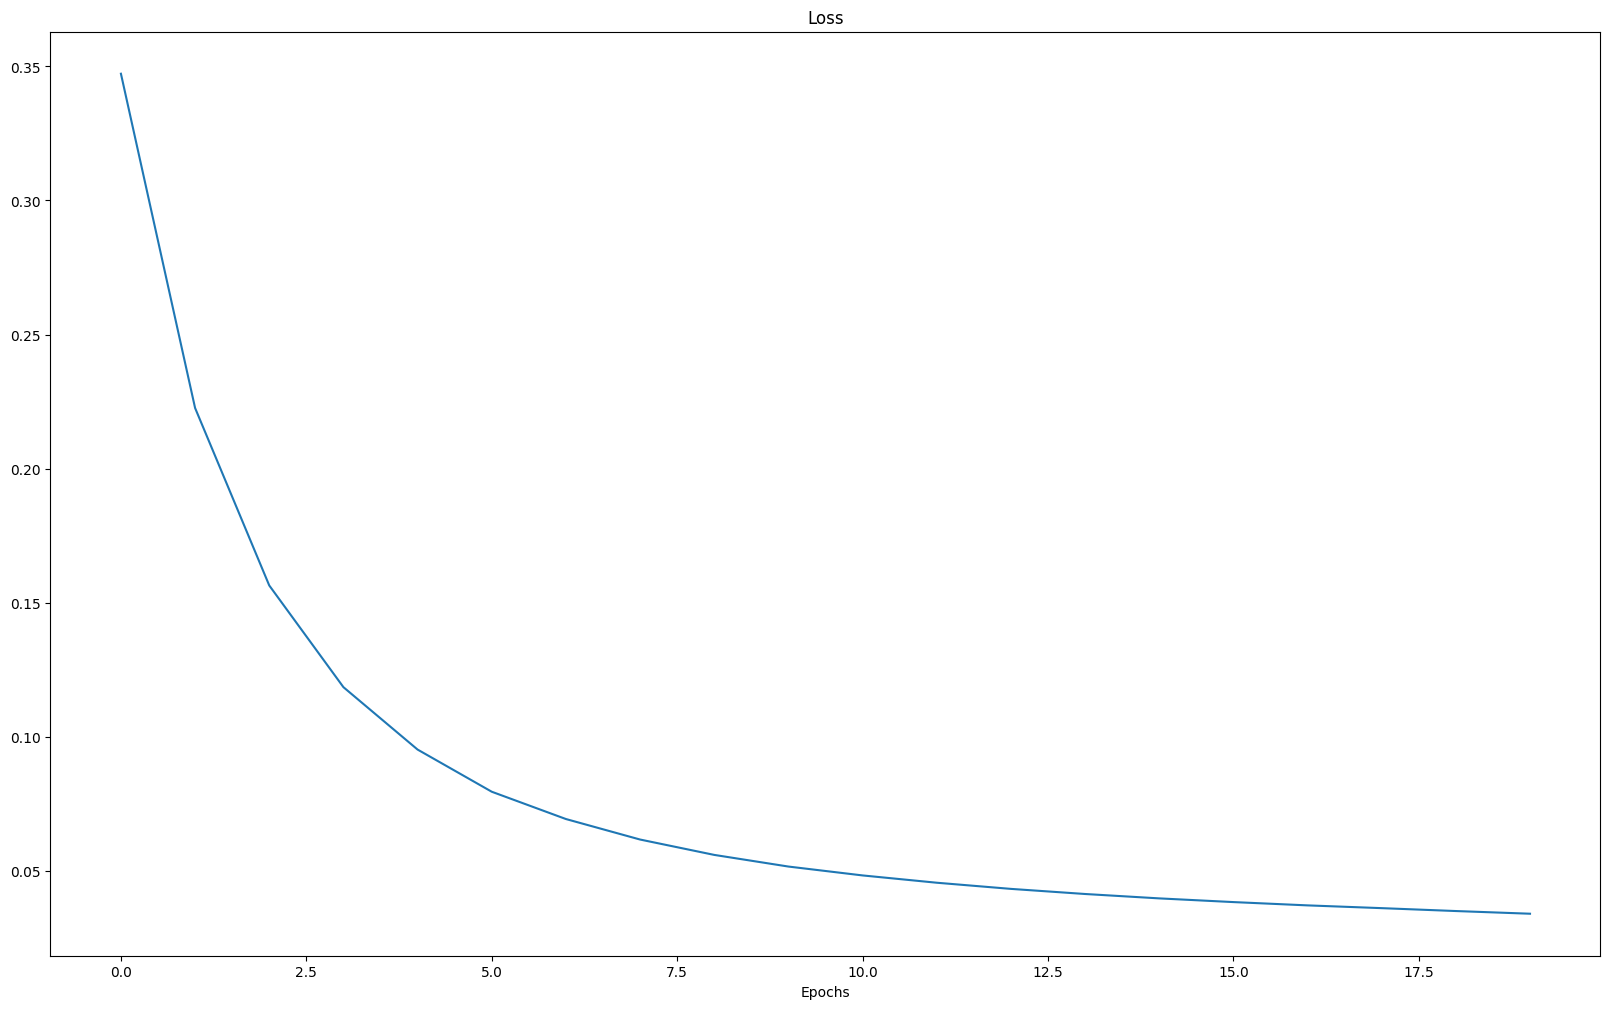

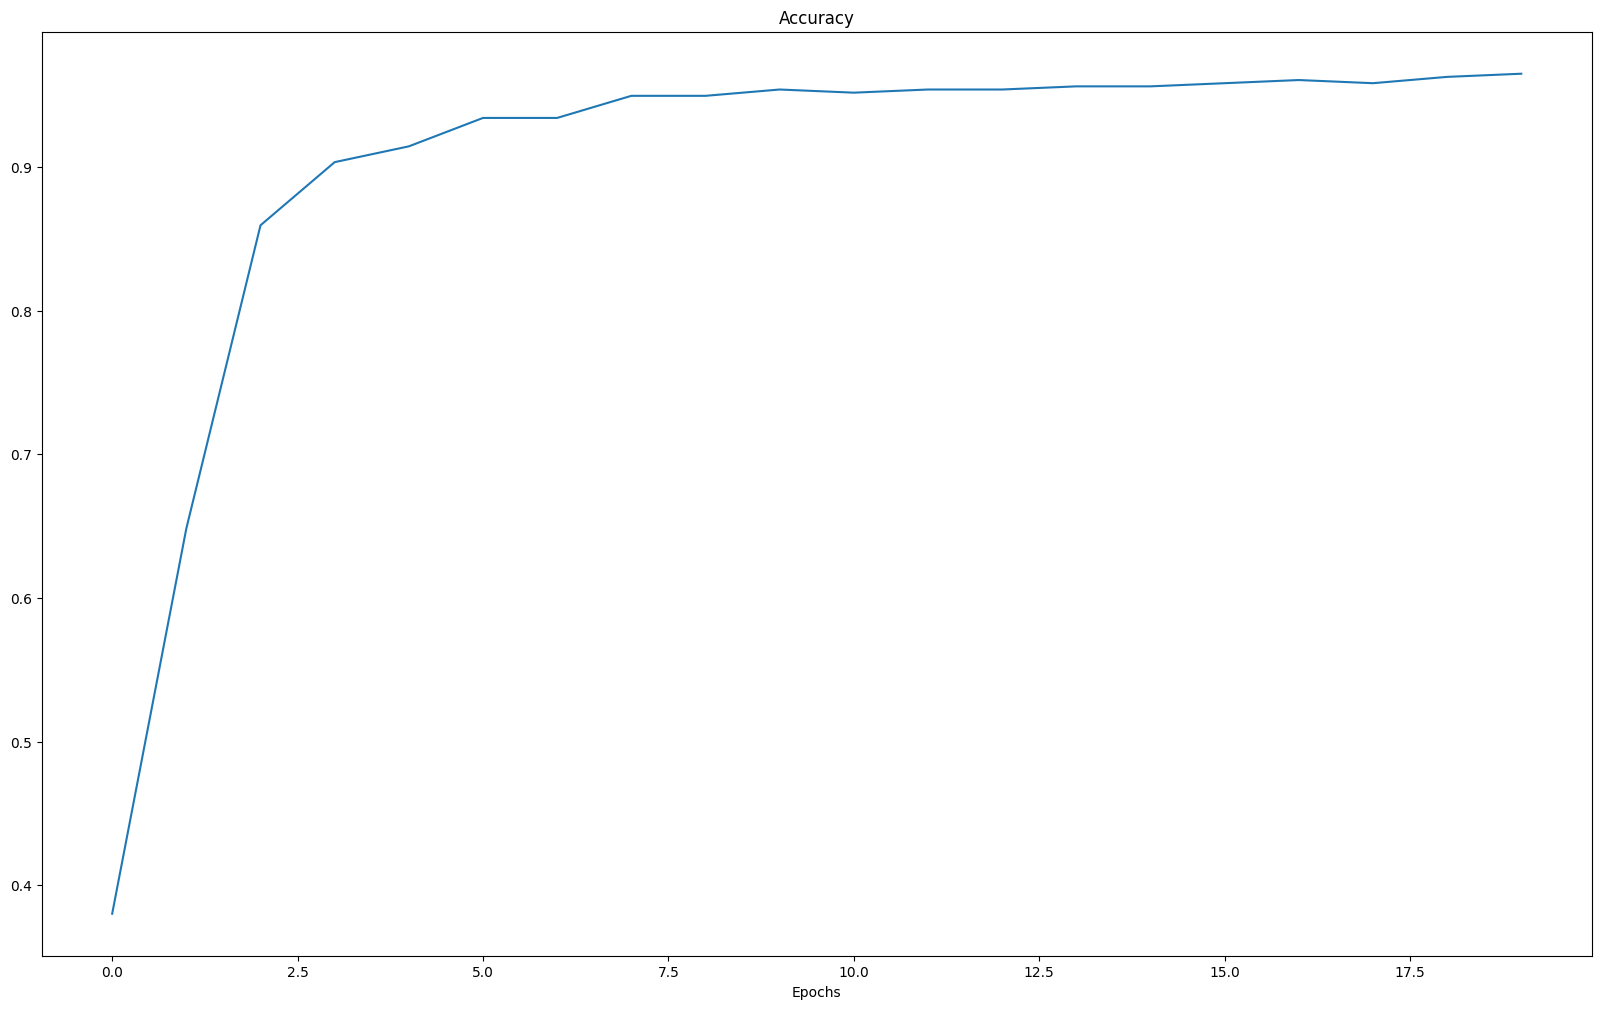

In [102]:
#plotting the loss and accuracy
plt.plot(model1.history.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.show()

#plotting the accuracy
plt.plot(model1.history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.show()


In [108]:
#evaluating the model
model1.evaluate(X_test,(y_test))

4/4 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9298


[0.037797652184963226, 0.9298245906829834]